<a href="https://colab.research.google.com/github/SmartDogy/Deep-Fried-Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Input
from keras import Sequential
from keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

In [10]:
X, Y = make_moons(n_samples=500, noise=0.25)

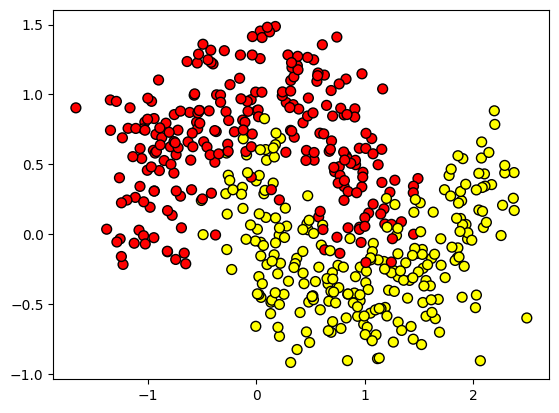

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn', s=50, edgecolors='black')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Without Normalization

In [25]:
model = Sequential([
    Input(shape=(2, )),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

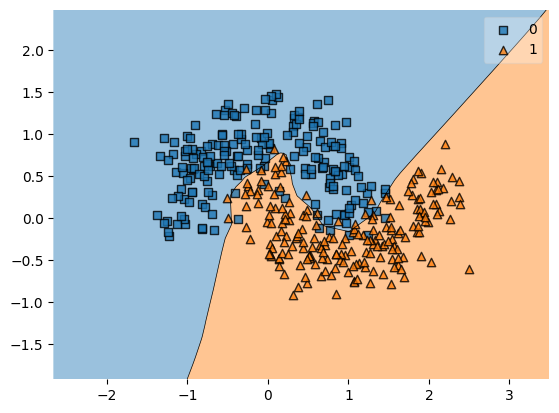

In [30]:
plot_decision_regions(x_train, y_train, clf=model)

With Regularization

In [32]:
model1 = Sequential([
    Input(shape=(2, )),
    Dense(64, activation='relu', kernel_regularizer=l2(0.03)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.03)),
    Dense(1, activation='sigmoid')
])

In [33]:
model1.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [36]:
history1 = model1.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

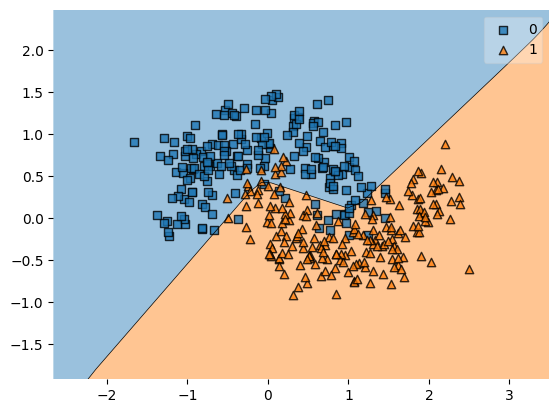

In [37]:
plot_decision_regions(x_train, y_train, clf=model1)

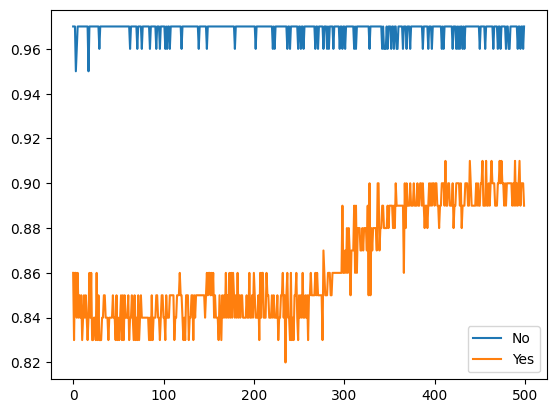

In [38]:
plt.plot(history.history['val_accuracy'], label='No')
plt.plot(history1.history['val_accuracy'], label='Yes')
plt.legend()